In [1]:
from src.graph import *
from src.mdp import *
from src.policy import *
from src.nyc import *

import pandas as pd

/Users/fabiopruneri/Documents/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Description of available graphs

In [9]:
# The available graphs are stored in
G

{'small': <src.graph.Graph at 0x7febc0090d90>,
 'medium': <src.graph.Graph at 0x7feb94ad7fd0>,
 'large': <src.graph.Graph at 0x7feb99e70250>,
 'line': <src.graph.Graph at 0x7feb9a0f5650>,
 'complete': <src.graph.Graph at 0x7feb9a0f5050>,
 'nyc': <src.graph.Graph at 0x7feb9a0f5690>}

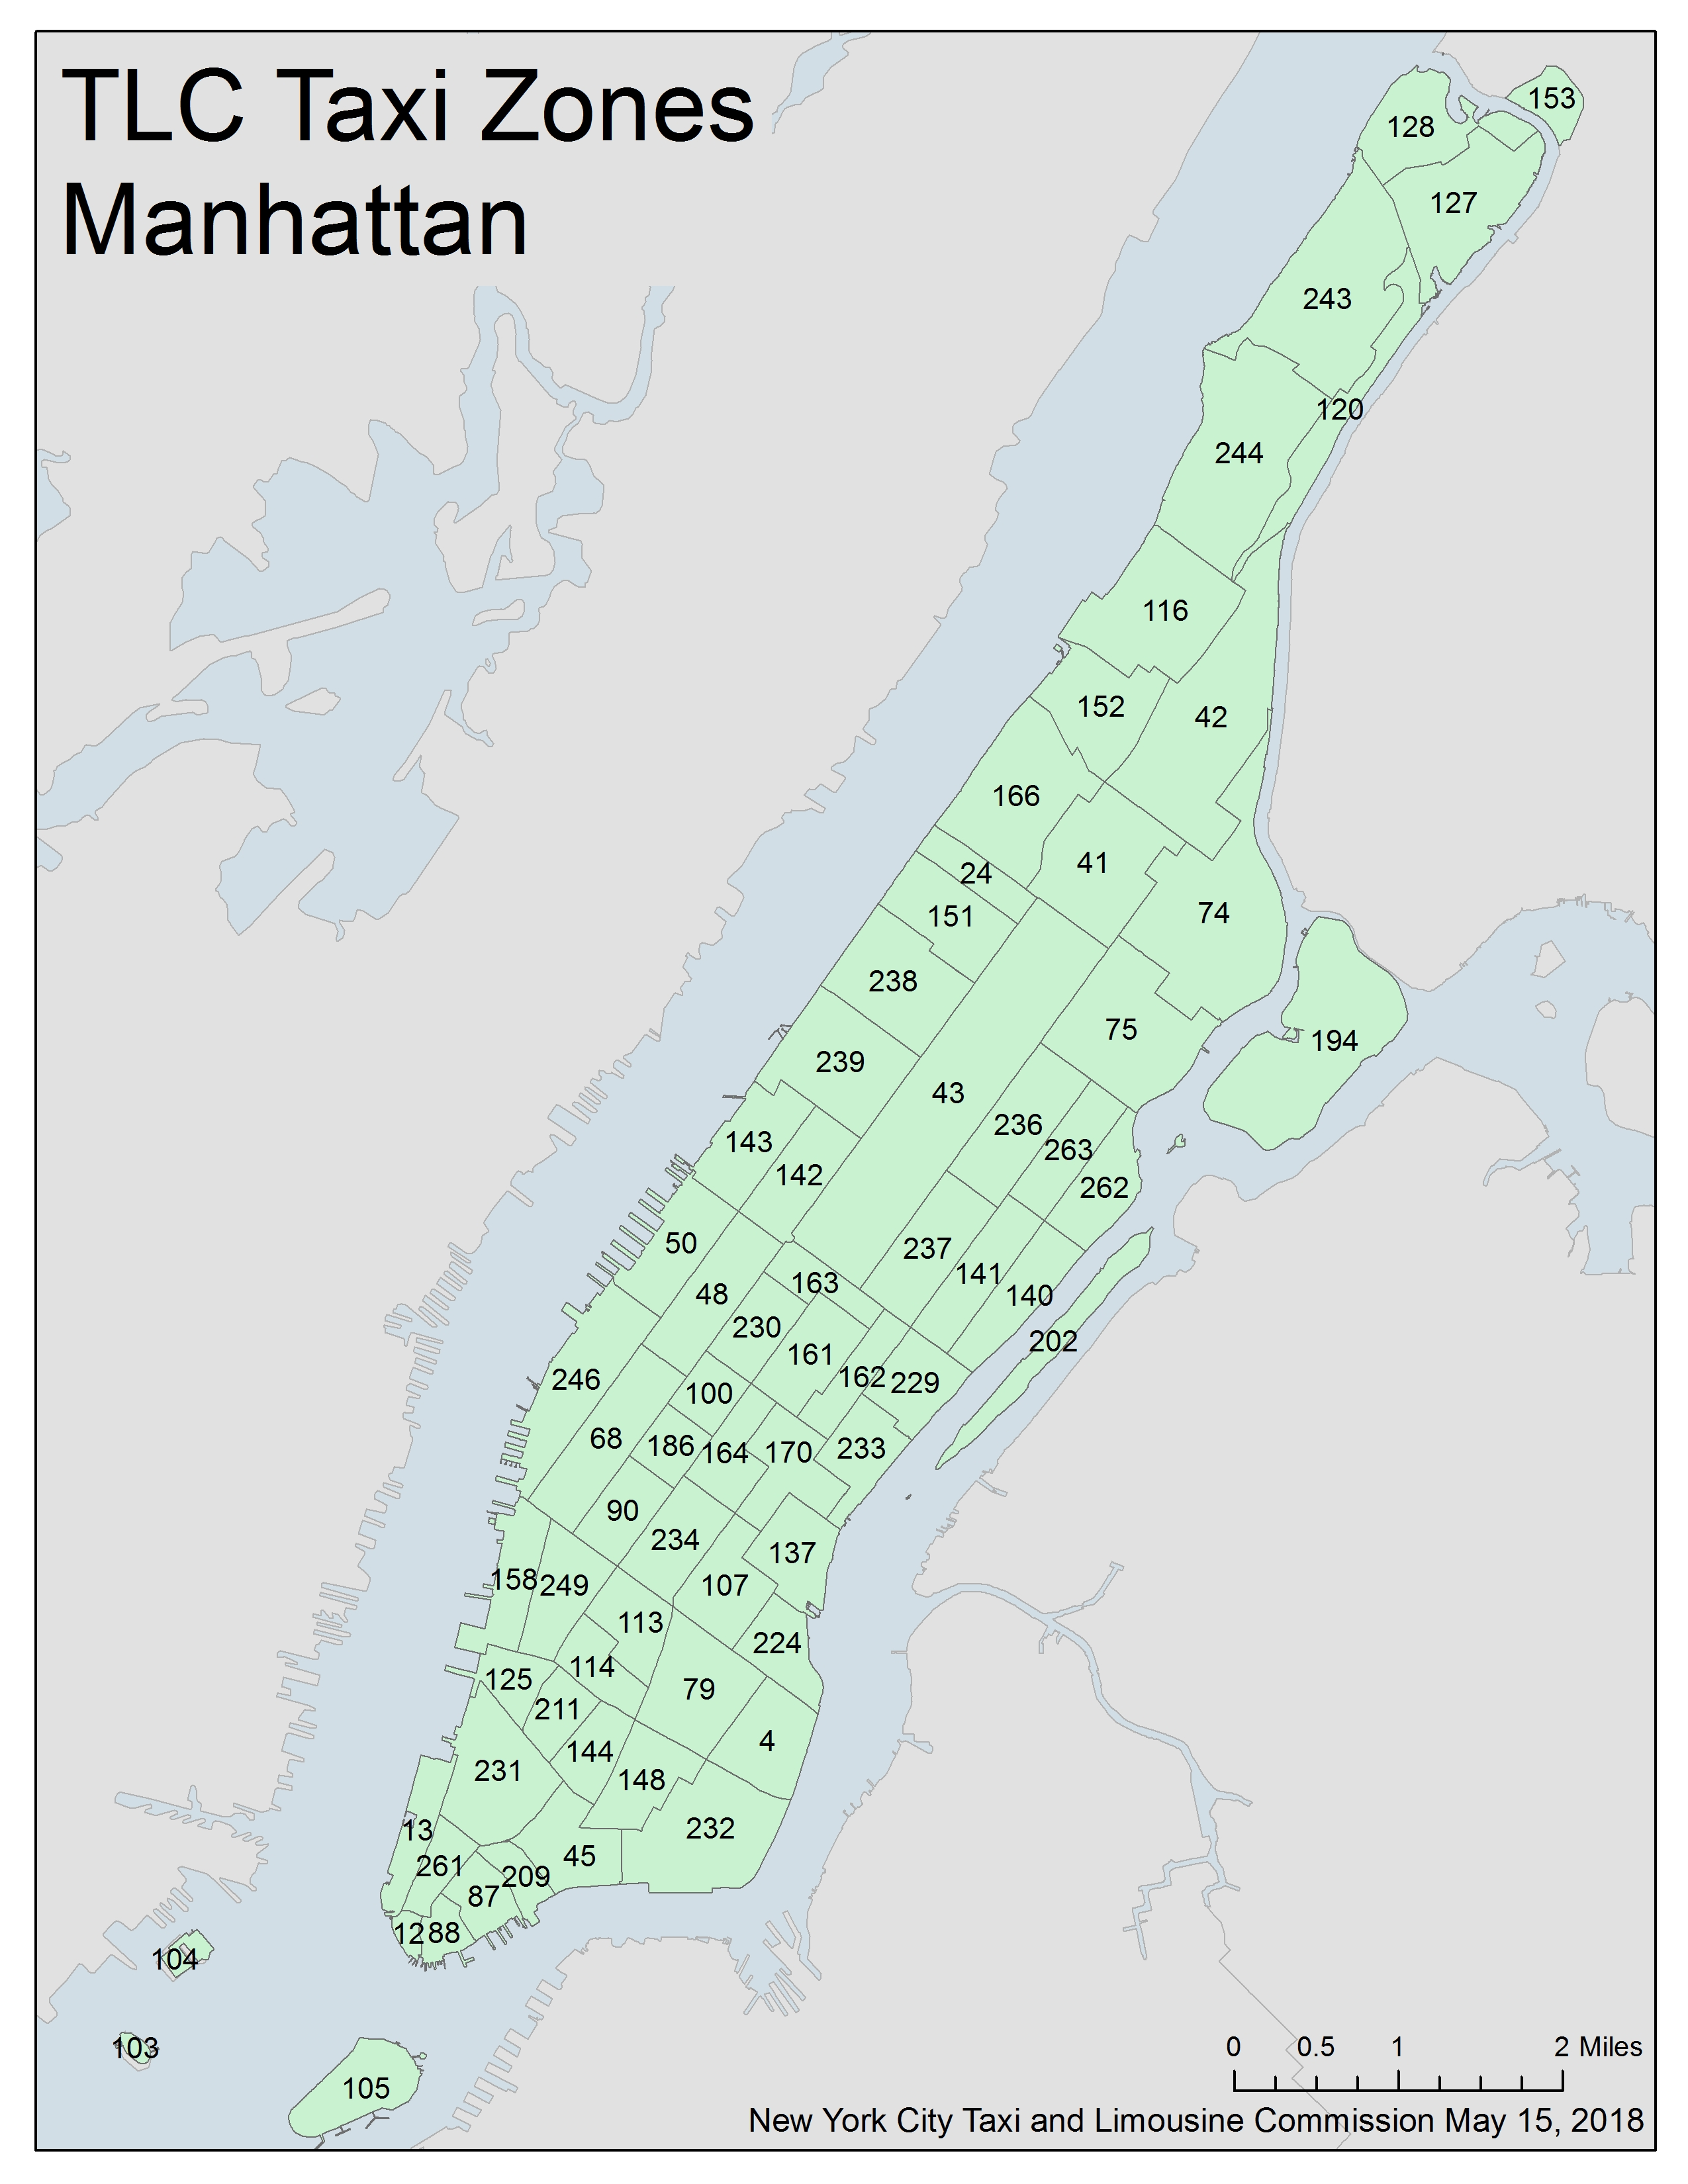

In [4]:
# They are, respectively:

# 'small': 
# 0 - 2 - 3
# | /
# 1

# 'medium': random connected graph on 20 vertices, 100 edges

# 'large': random connected graph on 100 vertices, 400 edges

# 'line': 0 - 1 - 2 - ... - 19, on 20 vertices

# 'complete': complete graph on 20 vertices

# 'nyc': represents the map below, 64 verices corresponding to the
#   numbered, non-island taxi zones in the map of Manhattan below.
#   Two vertices (zones) are connected by one of the 133 edges iff
#   they share a land border

from IPython.display import Image
Image(filename='data/taxi_map.jpg', width = 400, height = 400)

# Description of MDP and jargon

In [ ]:
# PLEASE READ THIS CAREFULLY! And look at the demos below.
# From now on we adopt the following terms:

# QUERY: a taxi trip, defined by pair (start, end) of vertices in the graph.
#        start is not necessarily different to end: trip within same zone.

# TICK: one time step, defined as the time a taxi takes to move between a
#       vertex and an adjacent one.

# G.d[v1, v2]: for a graph G, returns in O(1) the distance between v1, v2 in ticks.

# G.avgd: for a graph G, distance between a random pair of vertices, precomputed.

# K: number of available taxi in the current MDP. As a rule of thumb, we 
#    reccommend setting K = G.avgd + sqrt(N), so that roughly sqrt(N) taxi
#    drivers are free at any point in time.

# MDP: is defined from a Graph, a number of taxis K, and a way of generating queries.
#      On the nyc graph, queries are available historically (see src/nyc.py),
#      on the other graphs, they are picked with a random start and end.

# STATE (of mdp): a pair (POSITIONS, DELAYS, QUERY), where
#       POSITIONS: a K-tuple with the current position of each taxi driver.
#       DELAYS: a K-tuple with the remaining time for a driver to finish his trip.

In [3]:
mdp = MDP['small']

# 'small': 
# 0 - 2 - 3
# | /
# 1

In [7]:
# Get query
mdp.get_query()

(1, 0)

In [13]:
# Get random state
mdp.get_starting_state()

State(
POSITIONS: (2, 0, 0, 1)
DELAYS:    (0, 0, 0, 0)
QUERY: (3, 0)
)

In [10]:
# Distance between two vertices in the graph
mdp.G.d[1, 0]

1

In [11]:
# Policies are a mapping state -> action
policy_random

In [14]:
state = mdp.get_starting_state()
policy_random(state) # returns an action

1

In [15]:
# Reward function of the MDP (negative wait time)
mdp.R(state, 0) # For action 0

-2

In [16]:
# Transition function of the MDP (returns new state)
mdp.T(state, 0) # For action 0

State(
POSITIONS: (2, 3, 0, 2)
DELAYS:    (3, 0, 0, 0)
QUERY: (2, 3)
)

# Sample policy evaluation

In [9]:
# Please ask Fabio if you want to go through this step by step
mdp.eval(policy_greedy(mdp), no_iter=5, verbose=True)

Starting state: State(
POSITIONS: (0, 2, 1, 3)
DELAYS:    (0, 0, 0, 0)
QUERY: (0, 3)
) 
-----------------
Step 0 ; Action: 0 ; Reward 0 New state: State(
POSITIONS: (3, 2, 1, 3)
DELAYS:    (2, 0, 0, 0)
QUERY: (3, 0)
) 
-----------------
Step 1 ; Action: 3 ; Reward 0 New state: State(
POSITIONS: (3, 2, 1, 0)
DELAYS:    (1, 0, 0, 2)
QUERY: (2, 0)
) 
-----------------
Step 2 ; Action: 1 ; Reward 0 New state: State(
POSITIONS: (3, 0, 1, 0)
DELAYS:    (0, 1, 0, 1)
QUERY: (0, 1)
) 
-----------------
Step 3 ; Action: 1 ; Reward -1 New state: State(
POSITIONS: (3, 1, 1, 0)
DELAYS:    (0, 1, 0, 0)
QUERY: (0, 0)
) 
-----------------
Step 4 ; Action: 3 ; Reward 0 New state: State(
POSITIONS: (3, 1, 1, 0)
DELAYS:    (0, 0, 0, 0)
QUERY: (1, 0)
) 
-----------------
Total reward over 5 steps:  -1
Approx 20.0  pct of avg trip time


-1